<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearningBootCamp/blob/main/07_linear_regression_R201MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Preprocessing danych:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Regresja Liniowa przy użyciu scikit-learn](#2)
4. [Wizualizacja graficzna modelu](#3)
5. [Współczynnik $R^{2}$ ](#4)
6. [Końcowa postać modelu](#5)
7. [Regresja z podziałem na zbiór treningowy oraz testowy](#7)
8. [Regresja liniowa - zbiór treningowy - wizualizacja](#8)
9. [Regresja liniowa - zbiór testowy - wizualizacja](#9)
10. [Predykcja na podstawie modelu](#10)





### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'1.6.1'

### <a name='1'></a> Wygenerowanie danych

In [49]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


wyświetl 5 wierszy danych

In [50]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [51]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

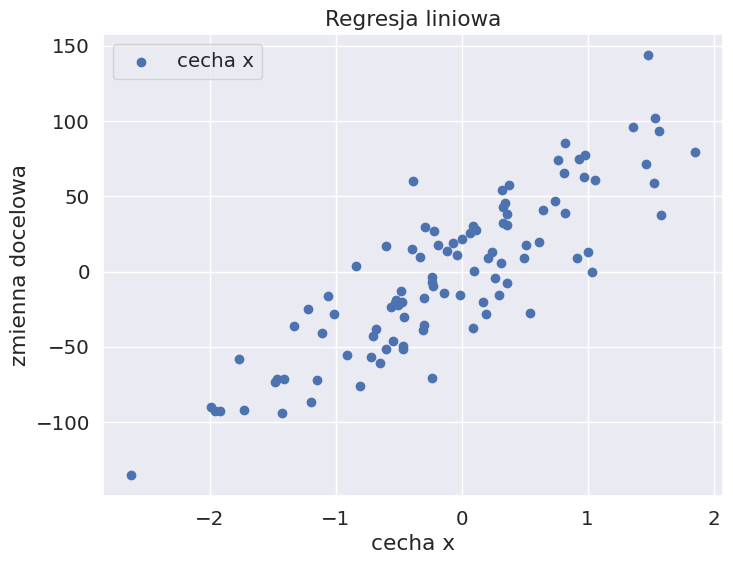

In [52]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot()

### <a name='2'></a> Regresja Liniowa przy użyciu scikit-learn

$Y = w_0 + w_1X_1$

In [53]:
from sklearn.linear_model import LinearRegression #import klasy

regressor = LinearRegression() #typ regresji

# metoda fit() dopasowuje model liniowy do danych
regressor.fit(data, target) #dopasuj

LinearRegression()

wylicza R2 - współczynnik regresji - dopasowania

In [54]:
# metoda score() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
regressor.score(data, target)

0.7426670084336404

In [55]:
# metoda predict() dokonuje predykcji na podstawie modelu
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

### <a name='3'></a> Wizualizacja graficzna modelu

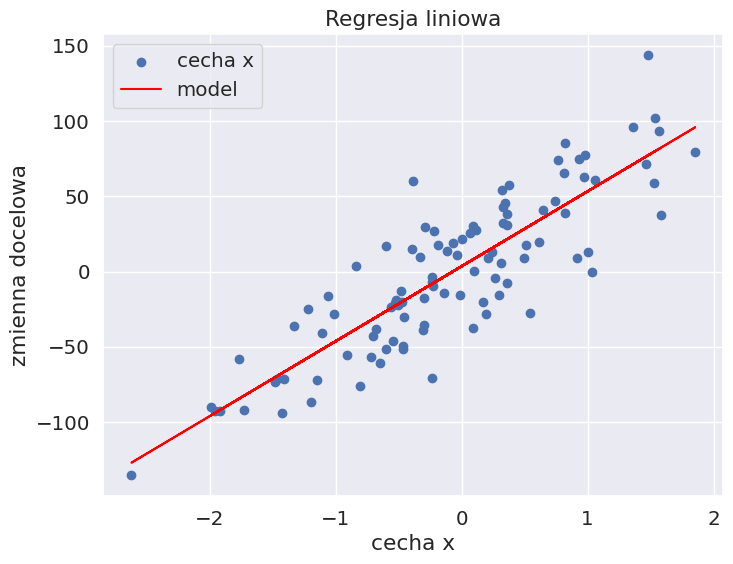

In [56]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

### <a name='4'></a> Współczynnik $R^{2}$
Współczynnik $R^2$ jest zdefiniowany jako $1 - \frac{u}{v}$, gdzie $u$ jest określone wzorem
```
((y_true - y_pred) ** 2).sum()
```
oraz $v$ jako
```
((y_true - y_true.mean()) ** 2).sum()
```
Czyli
```
1 - (((y_true - y_pred) ** 2).sum()) / (((y_true - y_true.mean()) ** 2).sum())
```
Najlepszą możliwą wartością jest 1.0. $R^{2}$ może przyjmować wartość ujemną. Model, który przewiduje zawsze dla każdej próbki wartość oczekiwaną zmiennej docelowej ma współczynnik $R^2$ równy 0.

In [57]:
regressor.score(data, target)

0.7426670084336404

In [58]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

współczynnik kierunkowy

y=ax+b

regressor coef wyświetla punkt a

In [59]:
regressor.coef_

array([49.83])

przecięcie z osią y

b

In [60]:
regressor.intercept_

np.float64(3.4953459615809184)

### <a name='5'></a> Końcowa postać modelu

$$Y = w_0 + w_1X_1$$
Postać modelu: $$Y = 3.495 + 49.83 \cdot X_1$$

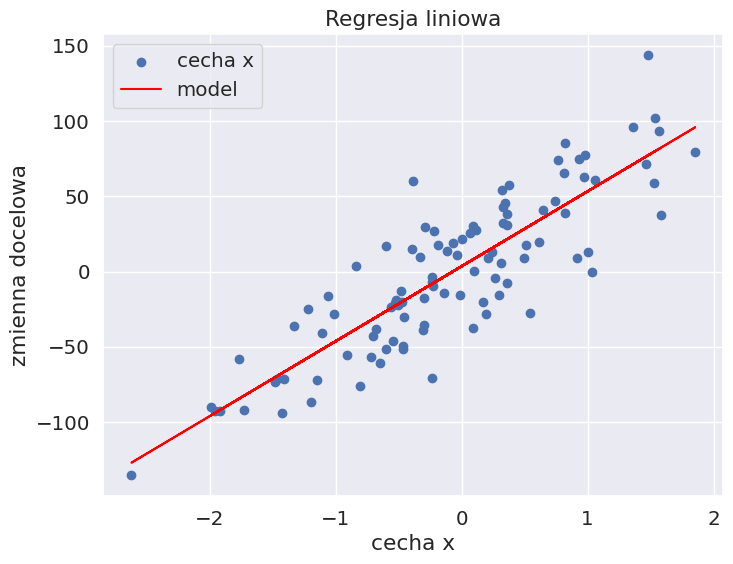

In [61]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

### <a name='7'></a> Regresja z podziałem na zbiór treningowy oraz testowy

In [77]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


podział na zbiory - treningowy i testowy

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


wykres składający się z 2 zbiorów - treningowy + testowy

[]

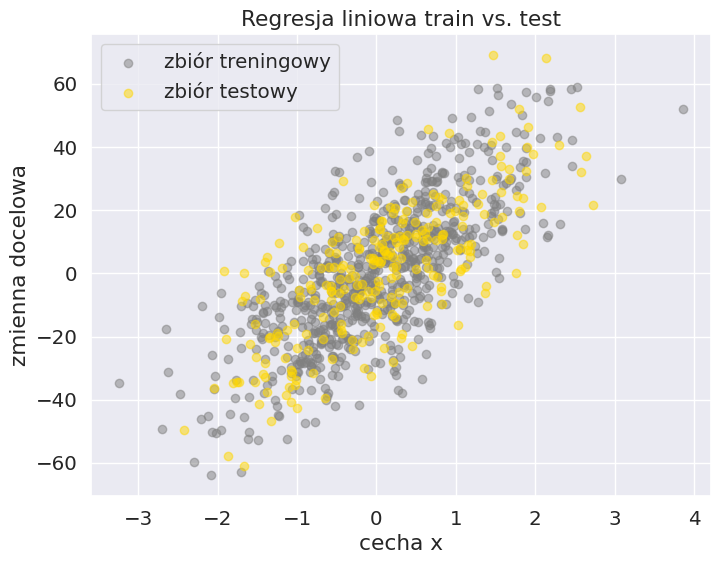

In [79]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

trenujemy na danych treningowych, testujemy na testowych

In [80]:
regressor = LinearRegression() #instancja klasy regresji liniowej
regressor.fit(X_train, y_train) #przekazujemy dane treningowe

LinearRegression()

R2 dla danych treningowych

In [85]:
regressor.score(X_train, y_train)

0.5423521710855336

R2 dla danych testowych

tych danych model nie widział

In [86]:
regressor.score(X_test, y_test)

0.5478304563942662

### <a name='8'></a> Regresja liniowa - zbiór treningowy - wizualizacja

[]

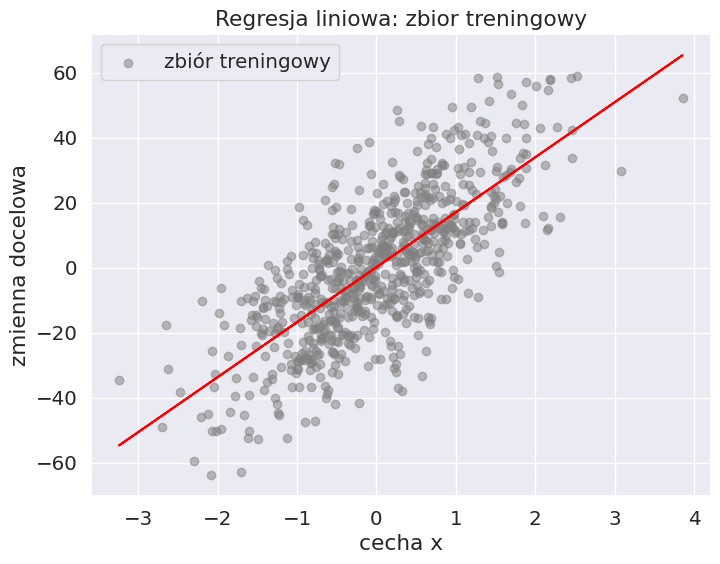

In [88]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()

### <a name='9'></a> Regresja liniowa - zbiór testowy - wizualizacja

[]

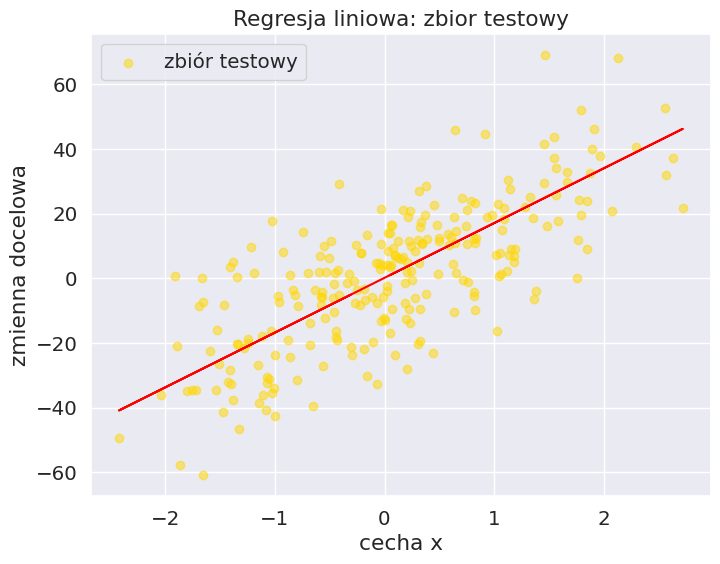

In [89]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.plot()

### <a name='10'></a> Predykcja na podstawie modelu

podajemy tylko dane testowe objaśniające, model ma wygenerować dane objaśnione na podstawie modelu

In [92]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,13.980732,0.948270
1,-9.650908,14.083709
2,-0.032544,-28.121509
3,9.066339,19.767063
4,-5.631999,-9.563319


podaje także błąd

In [93]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,13.980732,0.948270,13.032462
1,-9.650908,14.083709,-23.734618
2,-0.032544,-28.121509,28.088965
3,9.066339,19.767063,-10.700724
4,-5.631999,-9.563319,3.931320


rozkład błędu

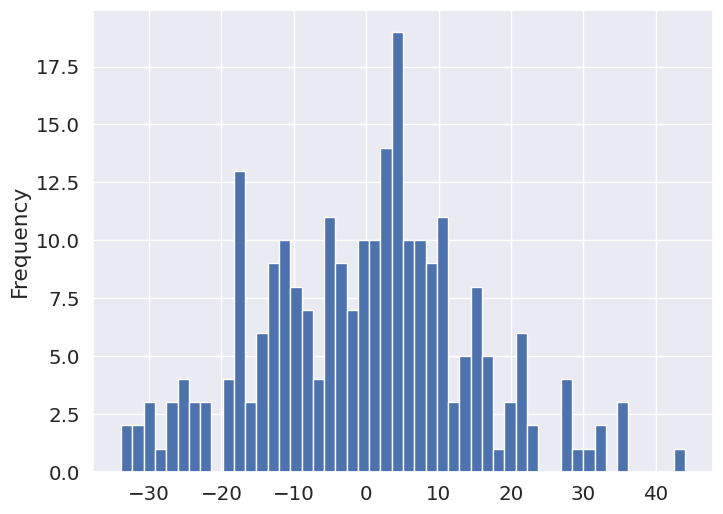

In [94]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8, 6))

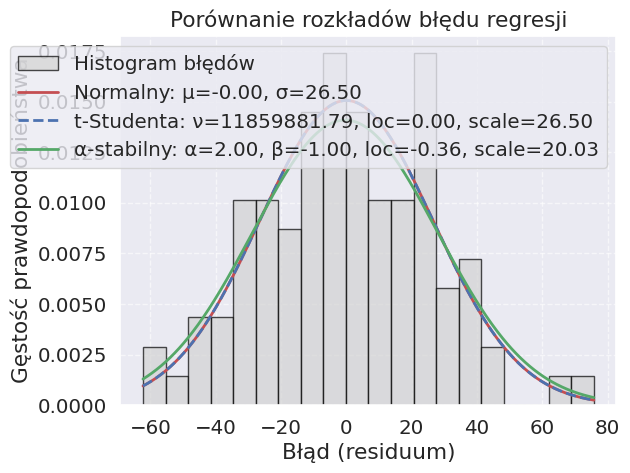

📊 Charakterystyki rozkładów:
Normalny:     μ=-0.000, σ=26.504
t-Studenta:   ν=11859881.793, loc=0.000, scale=26.505
α-stabilny:   α=2.000, β=-1.000, loc=-0.364, scale=20.031


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, t
from scipy.stats import levy_stable

# 1️⃣ Dane i model
np.random.seed(42)
data, target = make_regression(n_samples=100, n_features=1, noise=30.0, random_state=42)
regressor = LinearRegression().fit(data, target)
y_pred = regressor.predict(data)
residuals = target - y_pred

# 2️⃣ Histogram błędów
plt.hist(residuals, bins=20, density=True, color='lightgray', edgecolor='black', alpha=0.7, label='Histogram błędów')

# 3️⃣ Dopasowanie rozkładu normalnego
mu, sigma = norm.fit(residuals)
x = np.linspace(min(residuals), max(residuals), 500)
pdf_norm = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_norm, 'r-', lw=2, label=f'Normalny: μ={mu:.2f}, σ={sigma:.2f}')

# 4️⃣ Dopasowanie rozkładu t-Studenta
df_t, loc_t, scale_t = t.fit(residuals)
pdf_t = t.pdf(x, df_t, loc_t, scale_t)
plt.plot(x, pdf_t, 'b--', lw=2, label=f't-Studenta: ν={df_t:.2f}, loc={loc_t:.2f}, scale={scale_t:.2f}')

# 5️⃣ Dopasowanie rozkładu α-stabilnego
alpha, beta, loc_s, scale_s = levy_stable.fit(residuals)
pdf_stable = levy_stable.pdf(x, alpha, beta, loc_s, scale_s)
plt.plot(x, pdf_stable, 'g-', lw=2, label=f'α-stabilny: α={alpha:.2f}, β={beta:.2f}, loc={loc_s:.2f}, scale={scale_s:.2f}')

# 6️⃣ Wykres
plt.title('Porównanie rozkładów błędu regresji')
plt.xlabel('Błąd (residuum)')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 7️⃣ Wypisz współczynniki
print("📊 Charakterystyki rozkładów:")
print(f"Normalny:     μ={mu:.3f}, σ={sigma:.3f}")
print(f"t-Studenta:   ν={df_t:.3f}, loc={loc_t:.3f}, scale={scale_t:.3f}")
print(f"α-stabilny:   α={alpha:.3f}, β={beta:.3f}, loc={loc_s:.3f}, scale={scale_s:.3f}")


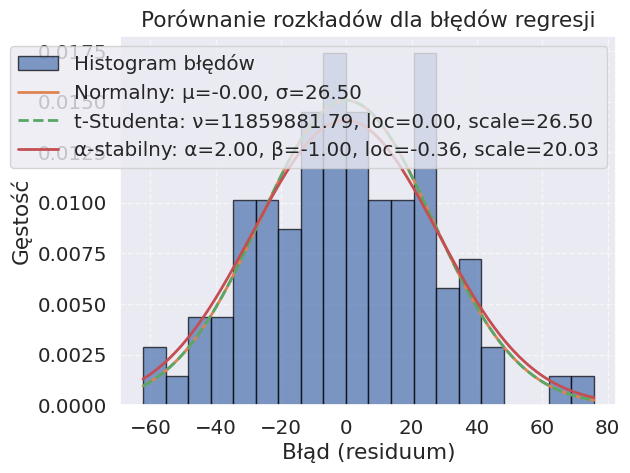


📊 Pełna statystyka reszt:
                     n:  100.0000
                   min: -62.2710
                   p01: -58.1306
                   p05: -41.9131
              q1 (25%): -18.5251
                median: -0.3638
              q3 (75%):  19.6949
                   p95:  40.6545
                   p99:  66.6759
                   max:  75.7942
                  mean: -0.0000
                   std:  26.6380
                   var:  709.5841
              skewness:  0.0489
     kurtosis (excess): -0.0426
    kurtosis (Pearson):  2.9574
                   IQR:  38.2200
  MAD (median abs dev):  19.4395
                   MAE:  21.3135
                  RMSE:  26.5045
               MAPE[%]:  443.4266

Shapiro–Wilk: W=0.9924, p-value=0.8519
Anderson–Darling (Normal): A2=0.1974, critical=[(np.float64(0.555), np.float64(15.0)), (np.float64(0.632), np.float64(10.0)), (np.float64(0.759), np.float64(5.0)), (np.float64(0.885), np.float64(2.5)), (np.float64(1.053), np.float64(1.0))]
KS

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, t, levy_stable, skew, kurtosis, median_abs_deviation, shapiro, anderson, kstest

# 1) Dane i model
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=30.0, random_state=42)
regressor = LinearRegression().fit(X, y)
yhat = regressor.predict(X)
res = y - yhat  # residua

# 2) Histogram + dopasowania (Normal, t-Student, α-stabilny)
plt.hist(res, bins=20, density=True, edgecolor='black', alpha=0.7, label='Histogram błędów')

x = np.linspace(res.min(), res.max(), 600)

# Normal
mu, sigma = norm.fit(res)
plt.plot(x, norm.pdf(x, mu, sigma), '-', lw=2, label=f'Normalny: μ={mu:.2f}, σ={sigma:.2f}')

# t-Student
df_t, loc_t, scale_t = t.fit(res)
plt.plot(x, t.pdf(x, df_t, loc_t, scale_t), '--', lw=2,
         label=f't-Studenta: ν={df_t:.2f}, loc={loc_t:.2f}, scale={scale_t:.2f}')

# α-stabilny
alpha, beta, loc_s, scale_s = levy_stable.fit(res)
plt.plot(x, levy_stable.pdf(x, alpha, beta, loc_s, scale_s), '-', lw=2,
         label=f'α-stabilny: α={alpha:.2f}, β={beta:.2f}, loc={loc_s:.2f}, scale={scale_s:.2f}')

plt.title('Porównanie rozkładów dla błędów regresji')
plt.xlabel('Błąd (residuum)')
plt.ylabel('Gęstość')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3) Pełna statystyka reszt
N = res.size
abs_res = np.abs(res)
mse  = np.mean(res**2)
rmse = np.sqrt(mse)
mae  = np.mean(abs_res)

# MAPE (z ominięciem y ≈ 0)
mask = np.abs(y) > 1e-9
mape = np.mean(np.abs((y[mask] - yhat[mask]) / y[mask])) * 100 if np.any(mask) else np.nan

stats_dict = {
    "n": N,
    "min": float(np.min(res)),
    "p01": float(np.percentile(res, 1)),
    "p05": float(np.percentile(res, 5)),
    "q1 (25%)": float(np.percentile(res, 25)),
    "median": float(np.median(res)),
    "q3 (75%)": float(np.percentile(res, 75)),
    "p95": float(np.percentile(res, 95)),
    "p99": float(np.percentile(res, 99)),
    "max": float(np.max(res)),
    "mean": float(np.mean(res)),
    "std": float(np.std(res, ddof=1)),
    "var": float(np.var(res, ddof=1)),
    "skewness": float(skew(res, bias=False)),
    "kurtosis (excess)": float(kurtosis(res, fisher=True, bias=False)),   # 0 dla N(0,1)
    "kurtosis (Pearson)": float(kurtosis(res, fisher=False, bias=False)), # 3 dla N(0,1)
    "IQR": float(np.percentile(res, 75) - np.percentile(res, 25)),
    "MAD (median abs dev)": float(median_abs_deviation(res, scale=1.0)),
    "MAE": float(mae),
    "RMSE": float(rmse),
    "MAPE[%]": float(mape),
}

print("\n📊 Pełna statystyka reszt:")
for k, v in stats_dict.items():
    print(f"{k:>22}: {v: .4f}")

# 4) Testy normalności (ostrożnie interpretować, bo parametry estymowane z próby)
# Shapiro–Wilk (do ~5000 obserwacji sensownie)
W, p_sw = shapiro(res)
print(f"\nShapiro–Wilk: W={W:.4f}, p-value={p_sw:.4f}")

# Anderson–Darling dla normalności (krytyczne wartości zamiast p-value)
ad_res = anderson(res, dist='norm')
print(f"Anderson–Darling (Normal): A2={ad_res.statistic:.4f}, critical={list(zip(ad_res.critical_values, ad_res.significance_level))}")

# KS względem dopasowanego rozkładu normalnego (nie w pełni „legalny”, ale poglądowy)
D_ks, p_ks = kstest(res, 'norm', args=(mu, sigma))
print(f"KS vs N(μ,σ): D={D_ks:.4f}, p-value={p_ks:.4f}")

# 5) Parametry dopasowanych rozkładów – podsumowanie
print("\n📌 Parametry dopasowań:")
print(f"Normalny:     μ={mu:.3f}, σ={sigma:.3f}")
print(f"t-Studenta:   ν={df_t:.3f}, loc={loc_t:.3f}, scale={scale_t:.3f}")
print(f"α-stabilny:   α={alpha:.3f}, β={beta:.3f}, loc={loc_s:.3f}, scale={scale_s:.3f}")


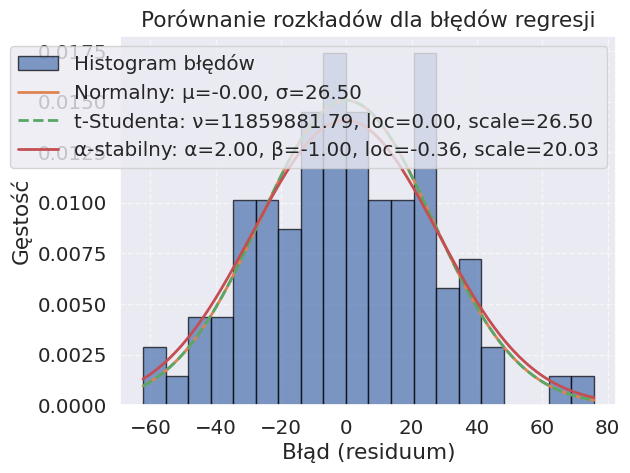


📊 Pełna statystyka reszt:
                     n:  100.0000
                   min: -62.2710
                   p01: -58.1306
                   p05: -41.9131
              q1 (25%): -18.5251
                median: -0.3638
              q3 (75%):  19.6949
                   p95:  40.6545
                   p99:  66.6759
                   max:  75.7942
                  mean: -0.0000
                   std:  26.6380
                   var:  709.5841
              skewness:  0.0489
     kurtosis (excess): -0.0426
    kurtosis (Pearson):  2.9574
                   IQR:  38.2200
  MAD (median abs dev):  19.4395
                   MAE:  21.3135
                  RMSE:  26.5045
               MAPE[%]:  443.4266

Shapiro–Wilk: W=0.9924, p-value=0.8519
Anderson–Darling (Normal): A2=0.1974, critical=[(np.float64(0.555), np.float64(15.0)), (np.float64(0.632), np.float64(10.0)), (np.float64(0.759), np.float64(5.0)), (np.float64(0.885), np.float64(2.5)), (np.float64(1.053), np.float64(1.0))]
KS

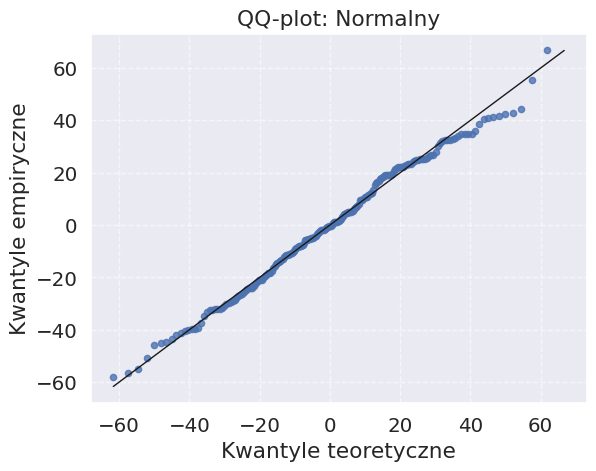

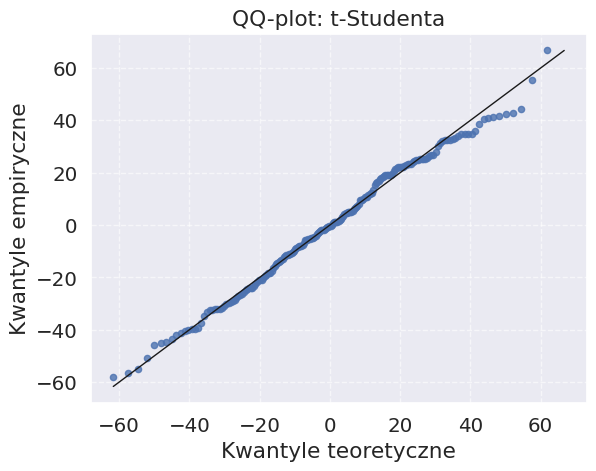

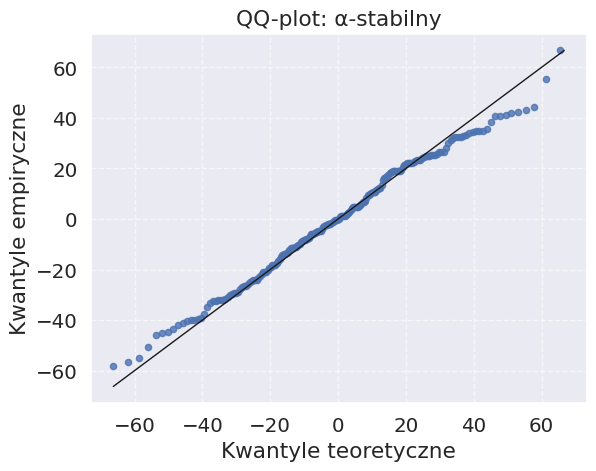


📌 AIC / BIC (mniejsze = lepsze):
Normalny:    AIC=943.25, BIC=948.46
t-Studenta:  AIC=945.25,    BIC=953.07
α-stabilny:  AIC=948.12,   BIC=958.54

Parametry dopasowań:
Normalny:    μ=-0.000, σ=26.504
t-Studenta:  ν=11859881.793, loc=0.000, scale=26.505
α-stabilny:  α=2.000, β=-1.000, loc=-0.364, scale=20.031


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, t, levy_stable, skew, kurtosis, median_abs_deviation, shapiro, anderson, kstest

# =========================
# 1) Dane i model regresji
# =========================
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=30.0, random_state=42)
regressor = LinearRegression().fit(X, y)
yhat = regressor.predict(X)
res = y - yhat  # residua (błędy modelu)

# =======================================================
# 2) Histogram + dopasowania: Normalny / t-Student / α-stabilny
# =======================================================
plt.hist(res, bins=20, density=True, edgecolor='black', alpha=0.7, label='Histogram błędów')
x = np.linspace(res.min(), res.max(), 600)

# Normal
mu, sigma = norm.fit(res)
plt.plot(x, norm.pdf(x, mu, sigma), '-', lw=2, label=f'Normalny: μ={mu:.2f}, σ={sigma:.2f}')

# t-Student
df_t, loc_t, scale_t = t.fit(res)
plt.plot(x, t.pdf(x, df_t, loc_t, scale_t), '--', lw=2,
         label=f't-Studenta: ν={df_t:.2f}, loc={loc_t:.2f}, scale={scale_t:.2f}')

# α-stabilny
alpha, beta, loc_s, scale_s = levy_stable.fit(res)
plt.plot(x, levy_stable.pdf(x, alpha, beta, loc_s, scale_s), '-', lw=2,
         label=f'α-stabilny: α={alpha:.2f}, β={beta:.2f}, loc={loc_s:.2f}, scale={scale_s:.2f}')

plt.title('Porównanie rozkładów dla błędów regresji')
plt.xlabel('Błąd (residuum)')
plt.ylabel('Gęstość')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# =========================
# 3) Pełna statystyka reszt
# =========================
N = res.size
abs_res = np.abs(res)
mse  = np.mean(res**2)
rmse = np.sqrt(mse)
mae  = np.mean(abs_res)

mask = np.abs(y) > 1e-9
mape = np.mean(np.abs((y[mask] - yhat[mask]) / y[mask])) * 100 if np.any(mask) else np.nan

stats_dict = {
    "n": N,
    "min": float(np.min(res)),
    "p01": float(np.percentile(res, 1)),
    "p05": float(np.percentile(res, 5)),
    "q1 (25%)": float(np.percentile(res, 25)),
    "median": float(np.median(res)),
    "q3 (75%)": float(np.percentile(res, 75)),
    "p95": float(np.percentile(res, 95)),
    "p99": float(np.percentile(res, 99)),
    "max": float(np.max(res)),
    "mean": float(np.mean(res)),
    "std": float(np.std(res, ddof=1)),
    "var": float(np.var(res, ddof=1)),
    "skewness": float(skew(res, bias=False)),
    "kurtosis (excess)": float(kurtosis(res, fisher=True, bias=False)),   # 0 dla N(0,1)
    "kurtosis (Pearson)": float(kurtosis(res, fisher=False, bias=False)), # 3 dla N(0,1)
    "IQR": float(np.percentile(res, 75) - np.percentile(res, 25)),
    "MAD (median abs dev)": float(median_abs_deviation(res, scale=1.0)),
    "MAE": float(mae),
    "RMSE": float(rmse),
    "MAPE[%]": float(mape),
}
print("\n📊 Pełna statystyka reszt:")
for k, v in stats_dict.items():
    print(f"{k:>22}: {v: .4f}")

# =========================
# 4) Testy normalności
# =========================
W, p_sw = shapiro(res)
print(f"\nShapiro–Wilk: W={W:.4f}, p-value={p_sw:.4f}")

ad_res = anderson(res, dist='norm')
print(f"Anderson–Darling (Normal): A2={ad_res.statistic:.4f}, critical={list(zip(ad_res.critical_values, ad_res.significance_level))}")

D_ks, p_ks = kstest(res, 'norm', args=(mu, sigma))
print(f"KS vs N(μ,σ): D={D_ks:.4f}, p-value={p_ks:.4f}")

# =========================
# 5) QQ-ploty (Normal / t / α-stabilny)
#    – porównujemy kwantyle empiryczne vs teoretyczne (PPF)
# =========================
def qqplot_emp_theor(sample, ppf, pmin=0.01, pmax=0.99, m=200, title='QQ-plot'):
    # Empiryczne kwantyle
    q_emp = np.quantile(sample, np.linspace(pmin, pmax, m))
    # Teoretyczne kwantyle
    q_the = ppf(np.linspace(pmin, pmax, m))
    # Wykres
    plt.scatter(q_the, q_emp, s=20, alpha=0.8)
    # Linia referencyjna y=x (idealne dopasowanie)
    lo = min(q_the.min(), q_emp.min())
    hi = max(q_the.max(), q_emp.max())
    plt.plot([lo, hi], [lo, hi], 'k-', lw=1)
    plt.title(title)
    plt.xlabel('Kwantyle teoretyczne')
    plt.ylabel('Kwantyle empiryczne')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# QQ – Normal
qqplot_emp_theor(res, lambda p: norm.ppf(p, loc=mu, scale=sigma), title='QQ-plot: Normalny')

# QQ – t-Studenta
qqplot_emp_theor(res, lambda p: t.ppf(p, df_t, loc=loc_t, scale=scale_t), title='QQ-plot: t-Studenta')

# QQ – α-stabilny (PPF istnieje w scipy, może być wolniejszy dla skrajnych p)
qqplot_emp_theor(res, lambda p: levy_stable.ppf(p, alpha, beta, loc=loc_s, scale=scale_s), title='QQ-plot: α-stabilny')

# =========================
# 6) AIC / BIC porównanie dopasowań
#    AIC = 2k - 2 lnL
#    BIC = k ln(n) - 2 lnL
#    k: liczba parametrów (Normal=2, t=3, α-stabilny=4)
# =========================
def loglike_sum_normal(sample, mu, sigma):
    return np.sum(norm.logpdf(sample, mu, sigma))

def loglike_sum_t(sample, nu, loc, scale):
    return np.sum(t.logpdf(sample, nu, loc, scale))

def loglike_sum_stable(sample, a, b, loc, scale):
    # Uwaga: levy_stable.logpdf może być wolniejszy/niestabilny numerycznie dla skrajów.
    return np.sum(levy_stable.logpdf(sample, a, b, loc, scale))

lnL_norm = loglike_sum_normal(res, mu, sigma)
lnL_t    = loglike_sum_t(res, df_t, loc_t, scale_t)
lnL_st   = loglike_sum_stable(res, alpha, beta, loc_s, scale_s)

def aic_bic(lnL, k, n):
    AIC = 2*k - 2*lnL
    BIC = k*np.log(n) - 2*lnL
    return AIC, BIC

AIC_norm, BIC_norm = aic_bic(lnL_norm, 2, N)
AIC_t,    BIC_t    = aic_bic(lnL_t,    3, N)
AIC_st,   BIC_st   = aic_bic(lnL_st,   4, N)

print("\n📌 AIC / BIC (mniejsze = lepsze):")
print(f"Normalny:    AIC={AIC_norm:.2f}, BIC={BIC_norm:.2f}")
print(f"t-Studenta:  AIC={AIC_t:.2f},    BIC={BIC_t:.2f}")
print(f"α-stabilny:  AIC={AIC_st:.2f},   BIC={BIC_st:.2f}")

# =========================
# 7) Podsumowanie parametrów dopasowań
# =========================
print("\nParametry dopasowań:")
print(f"Normalny:    μ={mu:.3f}, σ={sigma:.3f}")
print(f"t-Studenta:  ν={df_t:.3f}, loc={loc_t:.3f}, scale={scale_t:.3f}")
print(f"α-stabilny:  α={alpha:.3f}, β={beta:.3f}, loc={loc_s:.3f}, scale={scale_s:.3f}")
